In [2]:
!pip install fbm --quiet

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
from datetime import datetime, timedelta

np.random.seed(42)

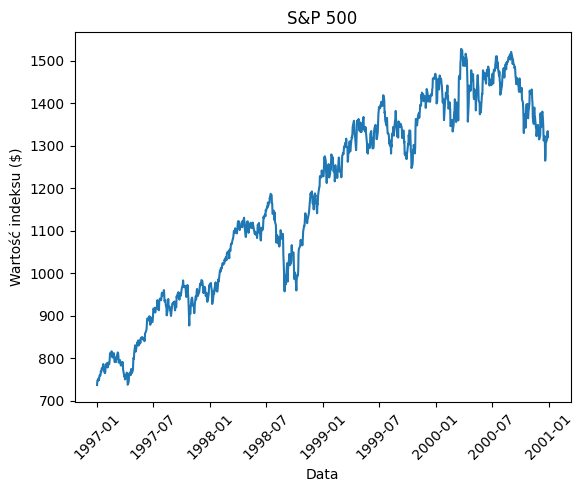

In [14]:
sp = yf.Ticker("^GSPC")

#1997
sp_hist = sp.history(start="1997-01-01", end="2000-12-31", interval="1d")

plt.plot(sp_hist['Close'])
plt.title("S&P 500")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.ylabel("Wartość indeksu ($)")
plt.show()

dates = pd.to_datetime(sp_hist.index)
t_numeric = (dates - dates[0]).days
prices = sp_hist['Close'].values

sp_hist = sp_hist.reset_index()
sp_hist["time"] = (sp_hist["Date"] - sp_hist["Date"].min()).dt.days

t = sp_hist["time"].values
y = sp_hist["Close"].values

$$
f(x) = A + B * x^{\alpha} \cdot (1 - C \cdot |\cos({\omega ~ \text{ln}(x)} + \phi))|
$$

In [11]:
# Funkcja log-periodyczna z |cos|
def log_periodic(t, A, B, alpha, tc, omega, phi, C):
    x = tc - t
    return A + B * x**alpha * (1 - C * np.abs(np.cos(omega * np.log(x) + phi)))

In [12]:
A_init = np.mean(prices)
B_init = -100
alpha_init = 0.5
tc_init = max(t_numeric) + 50
omega_init = 6
phi_init = 0
C_init = 0.5

p0 = [A_init, B_init, alpha_init, tc_init, omega_init, phi_init, C_init]

bounds = ([-np.inf, -np.inf, 0, max(t_numeric), 0, 0, 0],
          [np.inf, np.inf, 1, max(t_numeric) + 1000, 100, 2*np.pi, 1])

params, covariance = curve_fit(log_periodic, t_numeric, prices, p0=p0, bounds=bounds)

A_fit, B_fit, alpha_fit, tc_fit, omega_fit, phi_fit, C_fit = params

<ipython-input-11-e034bca809be>:4: RuntimeWarning: divide by zero encountered in log
  return A + B * x**alpha * (1 - C * np.abs(np.cos(omega * np.log(x) + phi)))
<ipython-input-11-e034bca809be>:4: RuntimeWarning: invalid value encountered in cos
  return A + B * x**alpha * (1 - C * np.abs(np.cos(omega * np.log(x) + phi)))


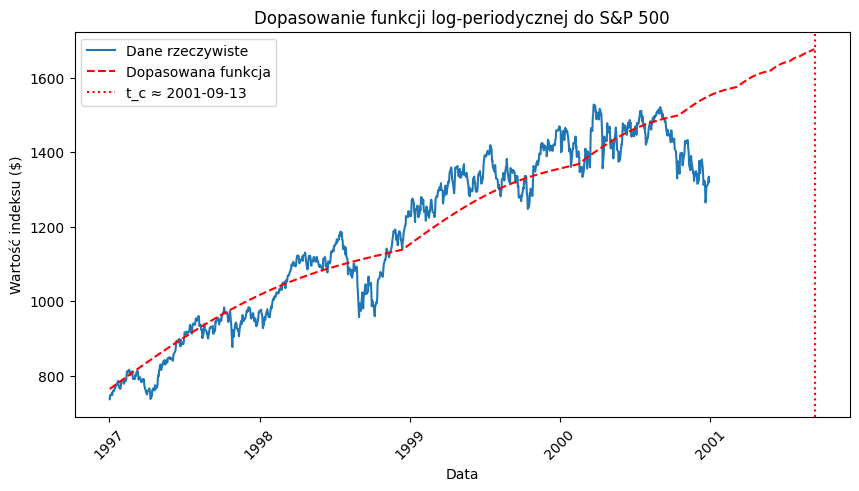

Dopasowane parametry:
A      = 1677.3723
B      = -0.5369
α      = 1.0000
t_c    = 1715.2364 (2001-09-13)
ω      = 5.6816
φ      = 0.0000
C      = 0.0899


In [13]:
t_fit = np.linspace(min(t_numeric), tc_fit, 600)
predicted_prices = log_periodic(t_fit, *params)

tc_date = (pd.to_datetime(dates[0]) + pd.to_timedelta(tc_fit, unit='D')).date()

plt.figure(figsize=(10, 5))
plt.plot(dates, prices, label="Dane rzeczywiste")
plt.plot(pd.to_datetime(dates[0]) + pd.to_timedelta(t_fit, unit='D'), predicted_prices,
         label="Dopasowana funkcja", linestyle="--", color="r")
plt.axvline(pd.to_datetime(tc_date), color="r", linestyle=":", label=f"t_c ≈ {tc_date}")
plt.title("Dopasowanie funkcji log-periodycznej do S&P 500")
plt.xlabel("Data")
plt.xlim()
plt.ylabel("Wartość indeksu ($)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

print(f"Dopasowane parametry:")
print(f"A      = {A_fit:.4f}")
print(f"B      = {B_fit:.4f}")
print(f"α      = {alpha_fit:.4f}")
print(f"t_c    = {tc_fit:.4f} ({tc_date})")
print(f"ω      = {omega_fit:.4f}")
print(f"φ      = {phi_fit:.4f}")
print(f"C      = {C_fit:.4f}")

$$
f(x) = A + B * x^{\alpha} \cdot (1 + C \cdot \cos({\omega ~ \text{ln}(x)} + \phi))
$$

In [ ]:
# Funkcja log-periodyczna
def log_periodic(t, A, B, alpha, tc, omega, phi, C):
    x = tc - t
    return A + B * x**alpha * (1 + C * np.cos(omega * np.log(x) + phi))

In [ ]:
A_init = np.mean(prices)
B_init = 0
alpha_init = 1
tc_init = max(t_numeric) + 30
omega_init = 10
phi_init = 0
C_init = 0.5

p0 = [A_init, B_init, alpha_init, tc_init, omega_init, phi_init, C_init]

bounds = ([-np.inf, -np.inf, 0, max(t_numeric), 0, -np.pi, 0], [np.inf, np.inf, 1, max(t_numeric) + 1000, 100, np.pi, 1])

params, covariance = curve_fit(log_periodic, t_numeric, prices, p0=p0, bounds=bounds)
A_fit, B_fit, alpha_fit, tc_fit, omega_fit, phi_fit, C_fit = params

<ipython-input-68-600fa43de977>:4: RuntimeWarning: divide by zero encountered in log
  return A + B * x**alpha * (1 + C * np.cos(omega * np.log(x) + phi))
<ipython-input-68-600fa43de977>:4: RuntimeWarning: invalid value encountered in cos
  return A + B * x**alpha * (1 + C * np.cos(omega * np.log(x) + phi))


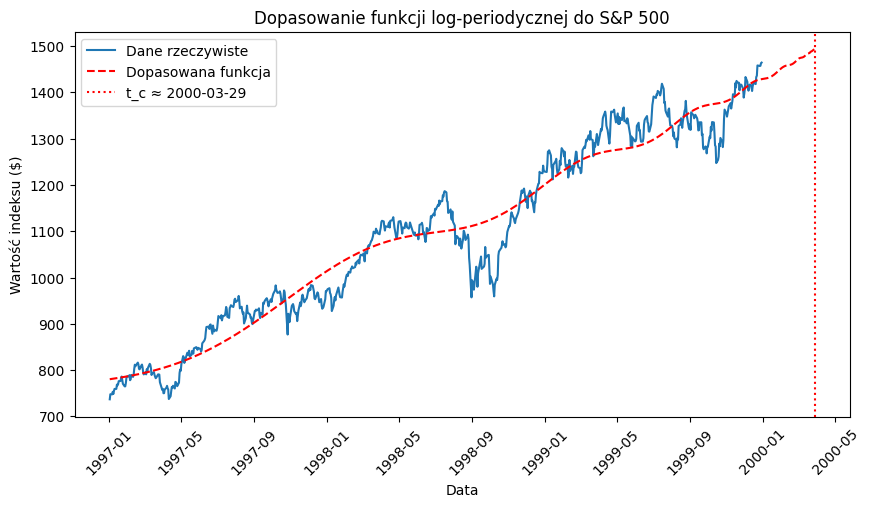

Dopasowane parametry:
A      = 1495.1958
B      = -1.1564
α      = 0.9054
t_c    = 1182.2057 (2000-03-29)
ω      = 9.5023
φ      = 3.1416
C      = 0.0673


In [ ]:
t_fit = np.linspace(min(t_numeric), tc_fit, 600)
predicted_prices = log_periodic(t_fit, *params)
tc_date = (pd.to_datetime(dates[0]) + pd.to_timedelta(tc_fit, unit='D')).date()

plt.figure(figsize=(10, 5))
plt.plot(dates, prices, label="Dane rzeczywiste")
plt.plot(pd.to_datetime(dates[0]) + pd.to_timedelta(t_fit, unit='D'), predicted_prices, label="Dopasowana funkcja", linestyle="--", color="r")
plt.axvline(pd.to_datetime(tc_date), color="r", linestyle=":", label=f"t_c ≈ {tc_date}")
plt.title("Dopasowanie funkcji log-periodycznej do S&P 500")
plt.xlabel("Data")
plt.ylabel("Wartość indeksu ($)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

print(f"Dopasowane parametry:")
print(f"A      = {A_fit:.4f}")
print(f"B      = {B_fit:.4f}")
print(f"α      = {alpha_fit:.4f}")
print(f"t_c    = {tc_fit:.4f} ({tc_date})")
print(f"ω      = {omega_fit:.4f}")
print(f"φ      = {phi_fit:.4f}")
print(f"C      = {C_fit:.4f}")

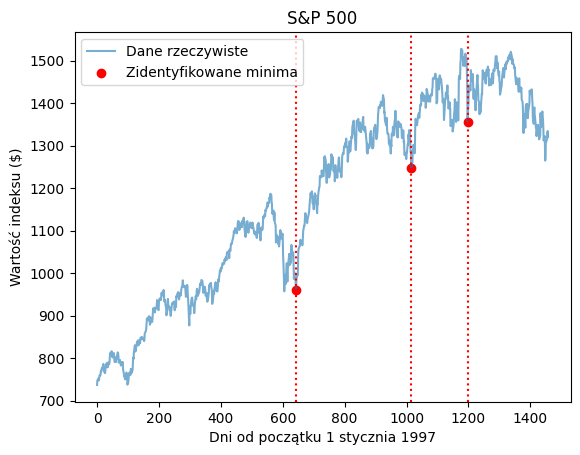

In [66]:
from scipy.signal import argrelextrema

approx_minima = [640, 1015, 1195]

def find_closest_minima(t, y, approx_minima, window=50):
    minima_indices = []
    for approx in approx_minima:
        min_range = (t > approx - window) & (t < approx + window)
        t_range = t[min_range]
        y_range = y[min_range]

        local_minima = argrelextrema(y_range, np.less)[0]

        if local_minima.size > 0:
            closest_min = local_minima[np.argmin(np.abs(t_range[local_minima] - approx))]
            minima_indices.append(np.where(t == t_range[closest_min])[0][0])
    return minima_indices

minima_indices = find_closest_minima(t, y, approx_minima)

t_min = t[minima_indices]
y_min = y[minima_indices]

plt.plot(t, y, label="Dane rzeczywiste", alpha=0.6)
plt.axvline(t_min[0], color="r", linestyle=":")
plt.axvline(t_min[1], color="r", linestyle=":")
plt.axvline(t_min[2], color="r", linestyle=":")
plt.scatter(t_min, y_min, color="red", label="Zidentyfikowane minima")
plt.xlabel("Dni od początku 1 stycznia 1997")
plt.ylabel("Wartość indeksu ($)")
plt.title("S&P 500")
plt.legend()
plt.show()

In [93]:
print(f"Lambda: {(t_min[1] - t_min[0]) / (t_min[2] - t_min[1]):.3f}")

Lambda: 2.566


In [94]:
start = t_min[-1]
dist = t_min[-1] - t_min[-2]
while dist > 1:
    dist /= 2
    start += dist

tc_date = (pd.to_datetime(dates[0]) + pd.to_timedelta(start, unit='D')).date()
print(f"Krach w dniu: {tc_date}")

Krach w dniu: 2000-07-29


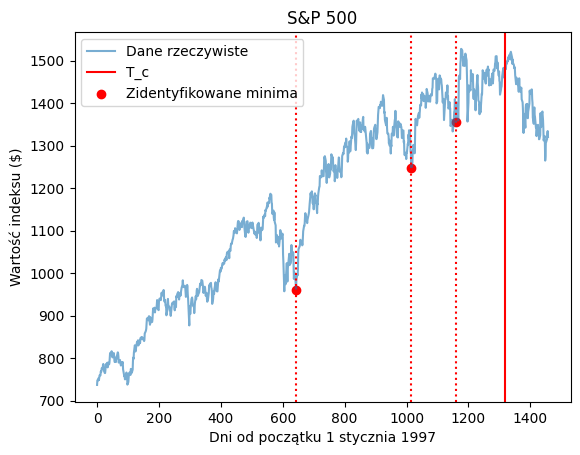

In [92]:
from scipy.signal import argrelextrema

approx_minima = [640, 1015, 1160]

def find_closest_minima(t, y, approx_minima, window=50):
    minima_indices = []
    for approx in approx_minima:
        min_range = (t > approx - window) & (t < approx + window)
        t_range = t[min_range]
        y_range = y[min_range]

        local_minima = argrelextrema(y_range, np.less)[0]

        if local_minima.size > 0:
            closest_min = local_minima[np.argmin(np.abs(t_range[local_minima] - approx))]
            minima_indices.append(np.where(t == t_range[closest_min])[0][0])
    return minima_indices

minima_indices = find_closest_minima(t, y, approx_minima)

t_min = t[minima_indices]
y_min = y[minima_indices]

plt.plot(t, y, label="Dane rzeczywiste", alpha=0.6)
plt.axvline(t_min[0], color="r", linestyle=":")
plt.axvline(t_min[1], color="r", linestyle=":")
plt.axvline(t_min[2], color="r", linestyle=":")

plt.axvline(start, color="r", linestyle="-", label="T_c")
plt.scatter(t_min, y_min, color="red", label="Zidentyfikowane minima")
plt.xlabel("Dni od początku 1 stycznia 1997")
plt.ylabel("Wartość indeksu ($)")
plt.title("S&P 500")
plt.legend()
plt.show()